Source:

https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset/data

# Introduction


*   Purpose: This project demonstrates the basics of data cleaning, focusing on preparing data for analysis by handling common issues such as missing values, duplicates, and formatting inconsistencies.
*   Dataset: The dataset consists of various laptop specifications, including screen resolution, processor type, weight, price, etc.





# Step 0: Loading the Dataset

*   Objective: Load the data and inspect its structure.
*   Steps:
  * Display the first few rows of the dataset to understand its layout.
  * Use .info() to check data types and detect any obvious issues with null values.



In [482]:
import pandas as pd
import numpy as np
from google.colab import drive
from scipy import stats
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [483]:
df = pd.read_csv("/content/drive/MyDrive/Beginner: Basic Data Cleaning/laptopData.csv")

In [484]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


# Step 1 Removing Duplicates

* Objective: Ensure data uniqueness.
* Steps:
  * Identify duplicate rows in the dataset.
  * Remove duplicates to avoid redundancy in analysis.

In [486]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.4+ KB


# Step 2: Dropping Null Values

In [487]:
df.isnull().sum()

,0
Unnamed: 0,1
Company,1
TypeName,1
Inches,1
ScreenResolution,1
Cpu,1
Ram,1
Memory,1
Gpu,1
OpSys,1


In [488]:
df.dropna(inplace=True)

In [489]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


# Step 3: Fixing The Columns

* Handling Missing Values
* Objective: Identify and address missing values.
* Steps:
  * Check for missing values in each column.
  * Handle missing values appropriately:
    * For categorical columns (like Screen), fill missing values with a placeholder, such as "Unknown".
    * Document the approach used for handling missing values.


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 129.3+ KB


In [491]:
df.drop(columns = "Unnamed: 0",inplace = True)

In [492]:
df.head(30)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


## Data Cleaning and Formatting
Objective: Clean specific columns to standardize formatting.
Steps:
Screen Resolution: Separate resolution into two columns (Screen and Resolution) for better usability.
CPU and GPU: Extract details like brand, model, and speed to allow for more granular analysis.
Weight: Remove non-numeric characters (e.g., "kg") and convert the column to float for numerical operations.
Price: Convert the Price column to a numeric type for easier analysis.

### Handling Resolution Column

In [493]:
df.insert(4,"Resolution","")

In [494]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Resolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [495]:
df["Resolution"] = df["ScreenResolution"].apply(lambda x:x.split(' ')[-1])

In [496]:
df["ScreenResolution"] = df["ScreenResolution"].apply(lambda x:x.split(' ')[:-1]).apply(lambda x:' '.join(x))

In [497]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Resolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [498]:
df.rename(columns = {'ScreenResolution':'Screen'}, inplace = True)

In [499]:
df['Screen'].replace('',"Unknown",inplace = True)

<ipython-input-499-6d268065651c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Screen'].replace('',"Unknown",inplace = True)


In [500]:
df.head(10)

,Company,TypeName,Inches,Screen,Resolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,Unknown,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14,Full HD,1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14,IPS Panel Full HD,1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


### Handling CPU Column

In [501]:
df.insert(6,'Processor_Model',"")

In [502]:
df.insert(7,'Processor_Speed',"")

In [503]:
df.head()

,Company,TypeName,Inches,Screen,Resolution,Cpu,Processor_Model,Processor_Speed,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5 2.3GHz,,,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5 1.8GHz,,,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U 2.5GHz,,,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7 2.7GHz,,,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5 3.1GHz,,,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [504]:
df["Processor_Model"] = df["Cpu"].apply(lambda x:x.split(' ')[:-1]).apply(lambda x:' '.join(x))
df["Processor_Speed"] = df["Cpu"].apply(lambda x:x.split(' ')[-1])

In [505]:
df.drop(columns = 'Cpu',inplace = True)

In [506]:
df.head()

,Company,TypeName,Inches,Screen,Resolution,Processor_Model,Processor_Speed,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Handling GPU column

In [507]:
df.insert(10,'GPU_Brand',"")
df.insert(11,'GPU_Model',"")

In [508]:
df.head()

,Company,TypeName,Inches,Screen,Resolution,Processor_Model,Processor_Speed,Ram,Memory,Gpu,GPU_Brand,GPU_Model,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,,,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,,,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,,,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,,,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,,,macOS,1.37kg,96095.8080


In [509]:
df['GPU_Brand'] = df['Gpu'].apply(lambda x:x.split(' ')[0])

In [510]:
df['GPU_Model'] = df['Gpu'].apply(lambda x:x.split(' ')[1:]).apply(lambda x:' '.join(x))

In [511]:
df.drop(columns='Gpu',inplace = True)

In [512]:
df.head()

,Company,TypeName,Inches,Screen,Resolution,Processor_Model,Processor_Speed,Ram,Memory,GPU_Brand,GPU_Model,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3GHz,8GB,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel,HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7GHz,16GB,512GB SSD,AMD,Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1GHz,8GB,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Step 4: Checking data types

* Objective: Ensure appropriate data types.
* Steps:
  * Convert the Inches column to float to allow for numerical operations.
  * Convert any other columns as necessary to ensure the dataset is ready for analysis.

In [513]:
df.reset_index(drop=True, inplace=True)

In [514]:
# Find any rows with non-numeric values in the 'Inches' column
non_numeric_inches = df[~df['Inches'].str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_inches)

    Company     TypeName Inches   Screen Resolution       Processor_Model  \
465    Dell  Workstation      ?  Full HD  1920x1080  Intel Core i7 7700HQ   

    Processor_Speed  Ram     Memory GPU_Brand     GPU_Model       OpSys  \
465          2.8GHz  8GB  256GB SSD    Nvidia  Quadro M1200  Windows 10   

     Weight      Price  
465  1.78kg  128298.24  


In [515]:
df['Inches'].replace('?',np.nan,inplace= True)

In [516]:
df.head(10)

,Company,TypeName,Inches,Screen,Resolution,Processor_Model,Processor_Speed,Ram,Memory,GPU_Brand,GPU_Model,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3GHz,8GB,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel,HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7GHz,16GB,512GB SSD,AMD,Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1GHz,8GB,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,Unknown,1366x768,AMD A9-Series 9420,3GHz,4GB,500GB HDD,AMD,Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.2GHz,16GB,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14,Full HD,1920x1080,Intel Core i7 8550U,1.8GHz,16GB,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14,IPS Panel Full HD,1920x1080,Intel Core i5 8250U,1.6GHz,8GB,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [517]:
non_numeric_inches = df[~df['Weight'].str.replace('.', '', 1).str.isnumeric()]
print(non_numeric_inches)

     Company            TypeName Inches                            Screen  \
0      Apple           Ultrabook   13.3          IPS Panel Retina Display   
1      Apple           Ultrabook   13.3                           Unknown   
2         HP            Notebook   15.6                           Full HD   
3      Apple           Ultrabook   15.4          IPS Panel Retina Display   
4      Apple           Ultrabook   13.3          IPS Panel Retina Display   
...      ...                 ...    ...                               ...   
1268  Lenovo  2 in 1 Convertible     14   IPS Panel Full HD / Touchscreen   
1269  Lenovo  2 in 1 Convertible   13.3  IPS Panel Quad HD+ / Touchscreen   
1270  Lenovo            Notebook     14                           Unknown   
1271      HP            Notebook   15.6                           Unknown   
1272    Asus            Notebook   15.6                           Unknown   

     Resolution                Processor_Model Processor_Speed   Ram  \
0  

In [518]:
df['Weight'].replace('?',np.nan,inplace= True)

<ipython-input-518-027d6cee9179>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].replace('?',np.nan,inplace= True)


In [519]:
# Remove 'kg' and convert to float
df['Weight'] = df['Weight'].str.replace('kg', '')

In [520]:
convert_dict = {'Inches':float,'Weight':float}

In [521]:
df = df.astype(convert_dict)

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1273 non-null   object 
 1   TypeName         1273 non-null   object 
 2   Inches           1272 non-null   float64
 3   Screen           1273 non-null   object 
 4   Resolution       1273 non-null   object 
 5   Processor_Model  1273 non-null   object 
 6   Processor_Speed  1273 non-null   object 
 7   Ram              1273 non-null   object 
 8   Memory           1273 non-null   object 
 9   GPU_Brand        1273 non-null   object 
 10  GPU_Model        1273 non-null   object 
 11  OpSys            1273 non-null   object 
 12  Weight           1272 non-null   float64
 13  Price            1273 non-null   float64
dtypes: float64(3), object(11)
memory usage: 139.4+ KB


In [523]:
df.head()

,Company,TypeName,Inches,Screen,Resolution,Processor_Model,Processor_Speed,Ram,Memory,GPU_Brand,GPU_Model,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3GHz,8GB,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel,HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7GHz,16GB,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1GHz,8GB,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,96095.8080


In [524]:
df['Price'] = df['Price'].round(2)

In [525]:
df.head()

,Company,TypeName,Inches,Screen,Resolution,Processor_Model,Processor_Speed,Ram,Memory,GPU_Brand,GPU_Model,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3GHz,8GB,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,47895.52
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel,HD Graphics 620,No OS,1.86,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7GHz,16GB,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1GHz,8GB,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,96095.81


In [526]:
#Before moving on, i want to make sure that we dont have any null row
df.isna().sum()

,0
Company,0
TypeName,0
Inches,1
Screen,0
Resolution,0
Processor_Model,0
Processor_Speed,0
Ram,0
Memory,0
GPU_Brand,0


In [527]:
df.dropna(inplace=True)

# Step 5: Removing Outliers

Objective:
Outliers are extreme values that can skew data analysis and impact the reliability of insights. This step focuses on identifying and removing outliers from key numerical columns in the dataset.

Method:


*   Box Plot Visualization: We start by using box plots to visually assess the distribution of values in each column, helping us quickly spot potential outliers.
*   IQR Method: To systematically detect and remove outliers, we use the Interquartile Range (IQR) method. The IQR approach identifies outliers as values that fall below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR).





## Creating Box Plot to analyze outliers

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns

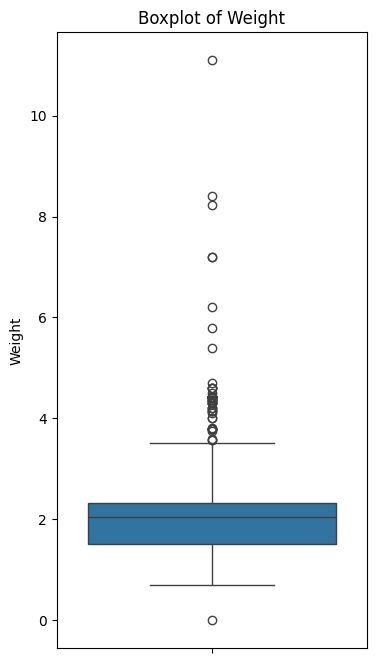

In [529]:
#BoxPlot for weight
plt.figure(figsize = (4,8))
sns.boxplot(y = df['Weight'])
plt.title('Boxplot of Weight')
plt.show()

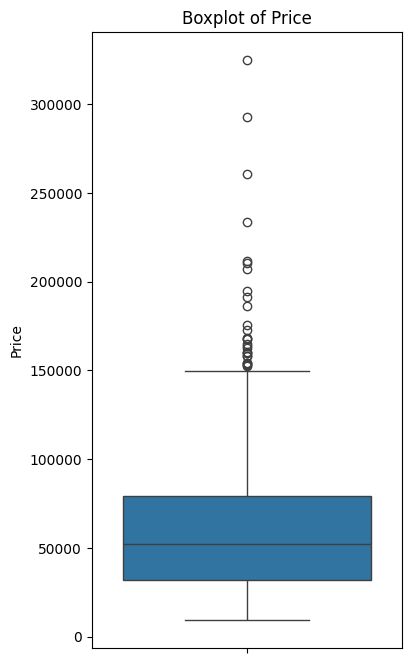

In [530]:
#Boxplot of Price
plt.figure(figsize=(4,8))
sns.boxplot(y=df['Price'])
plt.title('Boxplot of Price')
plt.show()

## Removing Outliers with IQR

In [531]:
df.head()

,Company,TypeName,Inches,Screen,Resolution,Processor_Model,Processor_Speed,Ram,Memory,GPU_Brand,GPU_Model,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,2.3GHz,8GB,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,71378.68
1,Apple,Ultrabook,13.3,Unknown,1440x900,Intel Core i5,1.8GHz,8GB,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,47895.52
2,HP,Notebook,15.6,Full HD,1920x1080,Intel Core i5 7200U,2.5GHz,8GB,256GB SSD,Intel,HD Graphics 620,No OS,1.86,30636.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display,2880x1800,Intel Core i7,2.7GHz,16GB,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,135195.34
4,Apple,Ultrabook,13.3,IPS Panel Retina Display,2560x1600,Intel Core i5,3.1GHz,8GB,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,96095.81


In [532]:
#defining a function
def detectOutliers(data,col):
  Q3 = np.quantile(data[col],0.75)
  Q1 = np.quantile(data[col],0.25)
  IQR = Q3 - Q1

  lower_range = Q1 - 1.5 * IQR
  upper_range = Q3 + 1.5 * IQR

  list_no_outliers = [x for x in data[col] if(
        (x > lower_range) &
        (x < upper_range)
    )]

  cleared_dataset = data.loc[data[col].isin(list_no_outliers)]
  return cleared_dataset

In [533]:
df = detectOutliers(df, 'Weight')

In [534]:
df = detectOutliers(df, 'Price')

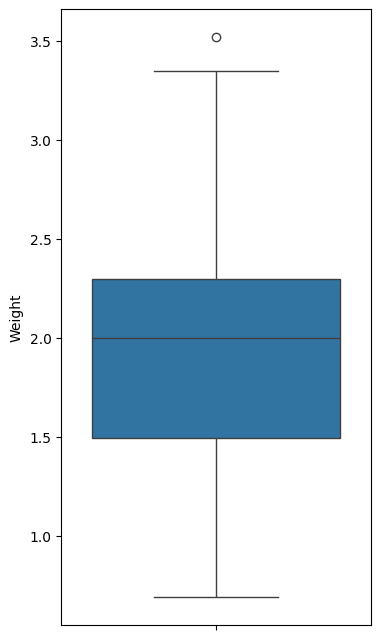

In [535]:
## Final Check
plt.figure(figsize=(4,8))
sns.boxplot(y=df['Weight'])
plt.show()

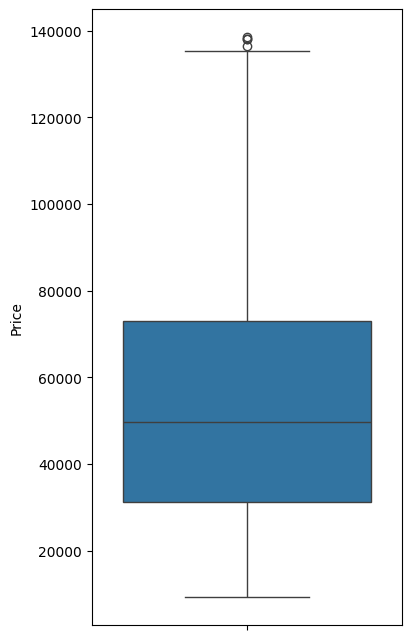

In [536]:
plt.figure(figsize=(4,8))
sns.boxplot(y=df['Price'])
plt.show()

# Conclusion

In this project, we successfully implemented intermediate-level data cleaning techniques to prepare a dataset of laptop specifications for analysis. Starting with data inspection, we identified and addressed common issues such as missing values, duplicate entries, and inconsistent formats. We standardized complex features like screen resolution and CPU details to improve the dataset’s structure and usability.

A key aspect of this project was outlier detection and removal, where we applied the Interquartile Range (IQR) method to identify and exclude extreme values in the Weight and Price columns. By visualizing the data with box plots before and after outlier removal, we confirmed the effectiveness of this approach in achieving a more balanced and reliable dataset.

Overall, this data cleaning process resulted in a cleaner, more accurate dataset, which is now better suited for analysis. These steps not only improve the quality of insights drawn from the data but also set a solid foundation for more advanced data preprocessing and analysis in future projects.